#12 Logistic Regression pada Binary Classification Task

Referensi: https://en.wikipedia.org/wiki/Logistic_regression

In [1]:
import pandas as pd

# Membaca file teks tab-separated (TSV)
df = pd.read_csv('./dataset/dataset/SMSSpamCollection',
                 sep='\t',           # File dipisahkan tab, bukan koma
                 header=None,        # File tidak memiliki header
                 names=['label', 'sms'])  # Menetapkan nama kolom secara manual

# Tampilkan 5 baris pertama
df.head()


,label,sms
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [2]:
# Menggunakan metode 'value_counts()' pada kolom 'label' dari DataFrame 'df'
# Metode ini menghitung jumlah kemunculan setiap nilai unik dalam kolom 'label'
df['label'].value_counts()

label
ham     4
spam    2
Name: count, dtype: int64

# Training & Testing Dataset

In [3]:
# Mengimpor LabelBinarizer dari modul sklearn.preprocessing
from sklearn.preprocessing import LabelBinarizer

# Mengambil nilai-nilai dari kolom 'sms' dan 'label' sebagai fitur (X) dan target (y) dari DataFrame 'df'
X = df['sms'].values
y = df['label'].values

# Membuat objek LabelBinarizer untuk mengkonversi nilai label menjadi bentuk biner
lb = LabelBinarizer()
# Mengubah nilai label menjadi bentuk biner dan meratakan array hasilnya
y = lb.fit_transform(y).ravel()
# Menampilkan nilai-nilai kelas yang digunakan oleh LabelBinarizer
lb.classes_

array(['ham', 'spam'], dtype='<U4')

In [4]:
# Mengimpor train_test_split dari modul sklearn.model_selection
from sklearn.model_selection import train_test_split


# Membagi dataset menjadi data latih (X_train dan y_train) dan data uji (X_test dan y_test)
# Dengan ukuran data uji sebesar 25% dari seluruh dataset dan nilai seed acak (random_state) adalah 0
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.25,
                                                    random_state=0)

# Menampilkan data latih dan labelnya
print(X_train, '\n')
print(y_train)

['Ok lar... Joking wif u oni...'
 'U dun say so early hor... U c already then say...'
 'Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...'
 "Nah I don't think he goes to usf, he lives around here though"] 

[0 0 0 0]


In [5]:
# Mengimpor TfidfVectorizer dari modul sklearn.feature_extraction.text
from sklearn.feature_extraction.text import TfidfVectorizer

# Membuat objek TfidfVectorizer dengan menghilangkan kata-kata bawaan bahasa Inggris ('stop words')
vectorizer = TfidfVectorizer(stop_words='english')

# Mengubah teks menjadi representasi TF-IDF (Term Frequency-Inverse Document Frequency)
# untuk data latih dan data uji menggunakan objek vectorizer yang sudah didefinisikan sebelumnya
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

# Menampilkan representasi TF-IDF dari data latih
print(X_train_tfidf)

  (0, 20)	0.4472135954999579
  (0, 26)	0.4472135954999579
  (0, 13)	0.4472135954999579
  (0, 16)	0.4472135954999579
  (0, 19)	0.4472135954999579
  (1, 12)	0.3779644730092272
  (1, 8)	0.3779644730092272
  (1, 22)	0.7559289460184544
  (1, 7)	0.3779644730092272
  (2, 25)	0.2773500981126145
  (2, 0)	0.2773500981126145
  (2, 10)	0.2773500981126145
  (2, 4)	0.2773500981126145
  (2, 2)	0.2773500981126145
  (2, 15)	0.2773500981126145
  (2, 27)	0.2773500981126145
  (2, 11)	0.2773500981126145
  (2, 3)	0.2773500981126145
  (2, 1)	0.2773500981126145
  (2, 5)	0.2773500981126145
  (2, 21)	0.2773500981126145
  (2, 14)	0.2773500981126145
  (3, 17)	0.408248290463863
  (3, 24)	0.408248290463863
  (3, 9)	0.408248290463863
  (3, 23)	0.408248290463863
  (3, 6)	0.408248290463863
  (3, 18)	0.408248290463863


In [6]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
import numpy as np

# 1. Load dataset
df = pd.read_csv('./dataset/dataset/SMSSpamCollection', sep='\t', header=None, names=['label', 'sms'])

# 2. Ubah label 'ham' dan 'spam' menjadi angka
df['label_num'] = df['label'].map({'ham': 0, 'spam': 1})

# 3. Bagi data menjadi train dan test dengan stratifikasi
X_train, X_test, y_train, y_test = train_test_split(
    df['sms'], df['label_num'], test_size=0.2, random_state=42, stratify=df['label_num']
)

# 4. Ubah teks menjadi representasi numerik (TF-IDF)
vectorizer = TfidfVectorizer()
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

# 5. Melatih model Logistic Regression
model = LogisticRegression()
model.fit(X_train_tfidf, y_train)

# 6. Prediksi pada data test
y_pred = model.predict(X_test_tfidf)

# 7. Menampilkan 5 hasil prediksi pertama
for pred, sms in zip(y_pred[:5], X_test[:5]):
    label = 'SPAM' if pred == 1 else 'HAM'
    print(f'PRED: {label} - SMS: {sms}\n')

PRED: HAM - SMS: Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's

PRED: HAM - SMS: U dun say so early hor... U c already then say...



In [7]:
from sklearn.metrics import confusion_matrix

# Misalnya:
# y_test dan y_pred sudah didefinisikan sebelumnya
matrix = confusion_matrix(y_test, y_pred)

tn, fp, fn, tp = matrix.ravel()

print(f'TN: {tn}')
print(f'FP: {fp}')
print(f'FN: {fn}')
print(f'TP: {tp}')


TN: 1
FP: 0
FN: 1
TP: 0


In [8]:
# Mengimpor accuracy_score dari modul sklearn.metrics
from sklearn.metrics import accuracy_score

# Menghitung akurasi dari model menggunakan nilai sebenarnya (y_test) dan nilai yang diprediksi (y_pred)
accuracy_score(y_test, y_pred)

0.5

In [9]:
from sklearn.metrics import precision_score

precision = precision_score(y_test, y_pred, zero_division=0)
print(f'Precision: {precision}')


Precision: 0.0


In [10]:
# Mengimpor recall_score dari modul sklearn.metrics
from sklearn.metrics import recall_score

# Menghitung recall dari model menggunakan nilai sebenarnya (y_test) dan nilai yang diprediksi (y_pred)
recall_score(y_test, y_pred)

0.0

In [11]:
from sklearn.metrics import f1_score

f1_score(y_test, y_pred)

0.0

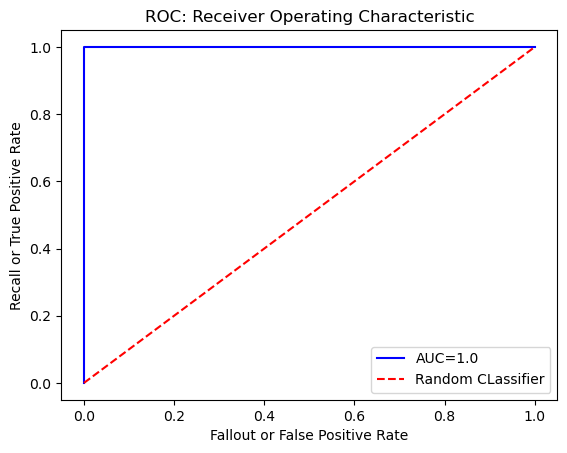

In [13]:
import matplotlib.pyplot as plt
# Mengimpor roc_curve dan auc dari modul sklearn.metrics
from sklearn.metrics import roc_curve, auc

# Menggunakan model untuk mendapatkan estimasi probabilitas untuk setiap kelas pada data uji
prob_estimates = model.predict_proba(X_test_tfidf)

# Menghitung false positive rate (fpr), true positive rate (tpr), dan threshold ROC
fpr, tpr, threshhold = roc_curve(y_test, prob_estimates[:, 1])

# Menghitung Area Under the Curve (AUC) dari kurva ROC
nilai_auc = auc(fpr, tpr)

# Menghitung Area Under the Curve (AUC) dari kurva ROC
plt.plot(fpr, tpr, 'b', label=f'AUC={nilai_auc}')
plt.plot([0,1], [0,1], 'r--', label='Random CLassifier')

# Menambahkan judul, label sumbu X, label sumbu Y, dan legenda
plt.title('ROC: Receiver Operating Characteristic')
plt.xlabel('Fallout or False Positive Rate')
plt.ylabel('Recall or True Positive Rate')
plt.legend()

# Menampilkan plot
plt.show()